# **Import Modules & Libraries**

In [1]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.9 MB/s eta 0:00:0000:0100:01


In [2]:
from pmdarima.arima import auto_arima

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# **Step 1: Load the Data**

In [4]:
# Load the Data
data= pd.read_csv('/kaggle/input/bangladesh-historical-weather-dataset-2008-2023/Bangladesh Historical Weather Dataset 2008-2023.csv')
data.head()

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (mp/h),windgusts_10m_max (mp/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²)
0,01-01-08,0.0,24.4,12.6,18.3,2008-01-01T06:42,2008-01-01T17:23,0.0,0.0,0.0,5.8,13.9,316.0,16.22
1,02-01-08,1.0,24.7,13.1,18.4,2008-01-02T06:43,2008-01-02T17:24,0.0,0.0,0.0,4.7,10.7,338.0,15.67
2,03-01-08,0.0,25.1,12.9,18.9,2008-01-03T06:43,2008-01-03T17:24,0.0,0.0,0.0,4.9,12.3,326.0,15.81
3,04-01-08,0.0,25.8,13.6,19.4,2008-01-04T06:43,2008-01-04T17:25,0.0,0.0,0.0,6.3,14.3,331.0,15.98
4,05-01-08,0.0,25.4,13.0,19.0,2008-01-05T06:43,2008-01-05T17:26,0.0,0.0,0.0,7.4,18.3,325.0,16.52


# **Step 2: Preprocessing the Data**

In [5]:
# Preprocessing the Data
# Assuming 'time' column is in datetime format
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%y')
data.set_index('time', inplace=True)
data=data.dropna(axis=0)

In [6]:
# Scaling Data (Optional, SARIMA is not sensitive to scale)
# Skip scaling if it's not required for dataset

# **Step 3: Split the dataset into training and testing sets**

In [7]:
# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# **Step 5: Auto Adjust Parameters for SARIMA**

In [8]:
auto_model = auto_arima(train['temperature_2m_mean (°C)'], seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=44.62 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=25444.747, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=11640.815, Time=22.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=18087.753, Time=5.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=42766.372, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=11639.760, Time=0.57 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=11640.850, Time=3.81 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=15.00 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=11571.012, Time=0.95 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=11571.702, Time=27.51 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=11571.734, Time=12.39 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=33.18 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=11505.586, Time=2.34 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=11506.999, Time=39.63 sec
 ARIMA(3,0,0)(0,

# **Step 6: Training**

In [26]:
model = SARIMAX(train['temperature_2m_mean (°C)'], order=auto_model.order, seasonal_order=auto_model.seasonal_order)
result = model.fit(disp=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# **Step 7: Predictions and Model evaluation**

In [27]:
predictions = result.get_forecast(steps=len(test))
forecast_mean = predictions.predicted_mean
confidence_int = predictions.conf_int()

# **Step 8: Calculate the evaluation metrics**

In [28]:
mse = mean_squared_error(test['temperature_2m_mean (°C)'], forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['temperature_2m_mean (°C)'], forecast_mean)

In [12]:
# Display the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 19.90372564509622
Root Mean Squared Error (RMSE): 4.46135917015165
Mean Absolute Error (MAE): 3.7427874314776104


# **Step 9: Weather Predictions**

In [13]:
forecast_steps = 365
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

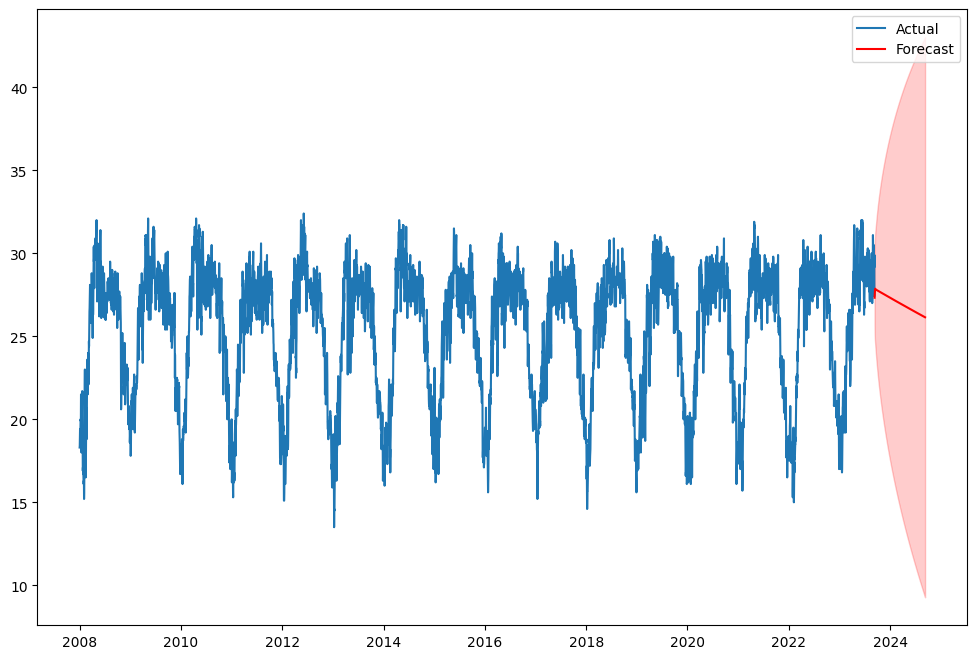

In [14]:
# Assuming 'forecast_index' is a DatetimeIndex
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='D')

# Ensure 'forecast_values' and 'confidence_int' have the same length
forecast_values = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(data['temperature_2m_mean (°C)'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='red', alpha=0.2)
plt.legend()
plt.show()


# **Step 10: Actual vs Predicted Values**

In [15]:
import pandas as pd

# Assuming 'forecast_index' is a DatetimeIndex
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='D')

# Ensure 'forecast_values' and 'confidence_int' have the same length
forecast_values = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
    'Date': forecast_index,
    'Actual': data['temperature_2m_mean (°C)'].tail(forecast_steps).values,
    'Predicted': forecast_values.values,
    'Lower Bound': confidence_int.iloc[:, 0].values,
    'Upper Bound': confidence_int.iloc[:, 1].values
})

# Print the DataFrame
print(result_df)

          Date  Actual  Predicted  Lower Bound  Upper Bound
0   2023-09-11    25.8  27.324877    25.690015    28.959738
1   2023-09-12    25.3  27.518606    25.119858    29.917354
2   2023-09-13    25.3  27.692600    24.861624    30.523577
3   2023-09-14    26.5  27.804274    24.710296    30.898252
4   2023-09-15    26.7  27.855770    24.590766    31.120774
..         ...     ...        ...          ...          ...
360 2024-09-05    28.1  26.165005     9.382012    42.947999
361 2024-09-06    27.4  26.160441     9.356151    42.964731
362 2024-09-07    29.1  26.155877     9.330324    42.981431
363 2024-09-08    29.9  26.151314     9.304533    42.998096
364 2024-09-09    29.2  26.146752     9.278776    43.014728

[365 rows x 5 columns]


# **Rainfall**

In [16]:
data.head()

,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (mp/h),windgusts_10m_max (mp/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²)
time,,,,,,,,,,,,,
2008-01-01,0.0,24.4,12.6,18.3,2008-01-01T06:42,2008-01-01T17:23,0.0,0.0,0.0,5.8,13.9,316.0,16.22
2008-01-02,1.0,24.7,13.1,18.4,2008-01-02T06:43,2008-01-02T17:24,0.0,0.0,0.0,4.7,10.7,338.0,15.67
2008-01-03,0.0,25.1,12.9,18.9,2008-01-03T06:43,2008-01-03T17:24,0.0,0.0,0.0,4.9,12.3,326.0,15.81
2008-01-04,0.0,25.8,13.6,19.4,2008-01-04T06:43,2008-01-04T17:25,0.0,0.0,0.0,6.3,14.3,331.0,15.98
2008-01-05,0.0,25.4,13.0,19.0,2008-01-05T06:43,2008-01-05T17:26,0.0,0.0,0.0,7.4,18.3,325.0,16.52


In [17]:
auto_model = auto_arima(train['rain_sum (mm)'], seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=32667.402, Time=34.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=34233.567, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=32841.722, Time=4.57 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=33156.483, Time=6.54 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=35295.308, Time=0.08 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=32664.712, Time=30.10 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=32663.552, Time=9.82 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=32664.686, Time=26.63 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=32731.550, Time=6.95 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=32662.728, Time=2.38 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=32664.013, Time=20.43 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=32664.036, Time=17.76 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=32666.485, Time=26.63 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=32825.626, Time=0.72 sec

In [18]:
model = SARIMAX(train['rain_sum (mm)'], order=auto_model.order, seasonal_order=auto_model.seasonal_order)
result = model.fit(disp=False)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
predictions = result.get_forecast(steps=len(test))
forecast_mean = predictions.predicted_mean
confidence_int = predictions.conf_int()

In [20]:
mse = mean_squared_error(test['rain_sum (mm)'], forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['rain_sum (mm)'], forecast_mean)

In [21]:
# Display the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 93.07971269150478
Root Mean Squared Error (RMSE): 9.647782786293687
Mean Absolute Error (MAE): 5.0709901576431875


In [22]:
forecast_steps = 365
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean

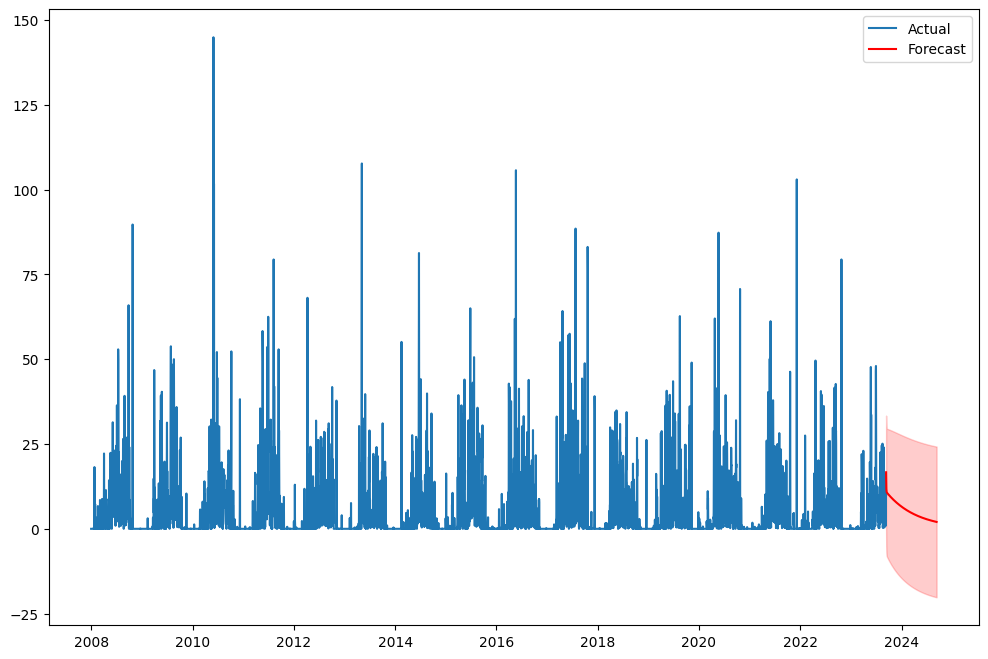

In [23]:
# Assuming 'forecast_index' is a DatetimeIndex
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='D')

# Ensure 'forecast_values' and 'confidence_int' have the same length
forecast_values = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(data['rain_sum (mm)'], label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='red', alpha=0.2)
plt.legend()
plt.show()

In [24]:
import pandas as pd

# Assuming 'forecast_index' is a DatetimeIndex
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='D')

# Ensure 'forecast_values' and 'confidence_int' have the same length
forecast_values = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({
    'Date': forecast_index,
    'Actual': data['rain_sum (mm)'].tail(forecast_steps).values,
    'Predicted': forecast_values.values,
    'Lower Bound': confidence_int.iloc[:, 0].values,
    'Upper Bound': confidence_int.iloc[:, 1].values
})

# Print the DataFrame
print(result_df)

          Date  Actual  Predicted  Lower Bound  Upper Bound
0   2023-09-11    19.4  16.666590    -0.037097    33.370277
1   2023-09-12    42.7  13.152385    -5.077165    31.381935
2   2023-09-13    27.7  11.736071    -6.843498    30.315640
3   2023-09-14    28.9  11.147250    -7.553152    29.847653
4   2023-09-15    25.0  10.884910    -7.878846    29.648665
..         ...     ...        ...          ...          ...
360 2024-09-05    10.1   2.065992   -20.141524    24.273508
361 2024-09-06    13.8   2.056444   -20.152191    24.265080
362 2024-09-07     0.9   2.046941   -20.162803    24.256685
363 2024-09-08    10.9   2.037482   -20.173361    24.248325
364 2024-09-09    10.0   2.028066   -20.183866    24.239998

[365 rows x 5 columns]


# **Thank You**